<a href="https://colab.research.google.com/github/luciojosep/Portfolio/blob/main/Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

## Datos simulados

En general, es difícil que los datos sigan una tendencia exactamente lineal. Por eso, a veces se pueden simular datos que sigan una tendencia deseada.

In [ ]:
import numpy as np

In [ ]:
# Crear datos de entrenamiento y prueba
np.random.seed(0)
N1=1000
# Generamos datos aleatorios con distribución normal
X1 = np.random.randn(N1, 1)
# Notar que la recta generada se centra en una ordenada de valor 2 y una pendiente de valor 3
y1 = 2 + 3 * X1 + np.random.randn(N1, 1)

### Gráfico exploratorio

Veamos con el paquete `matplotlib.pyplot` el gráfico de cómo se vinculan `X` e `y`. Para eso, usaremos el comando `scatter`:

In [ ]:
import matplotlib.pyplot as plt

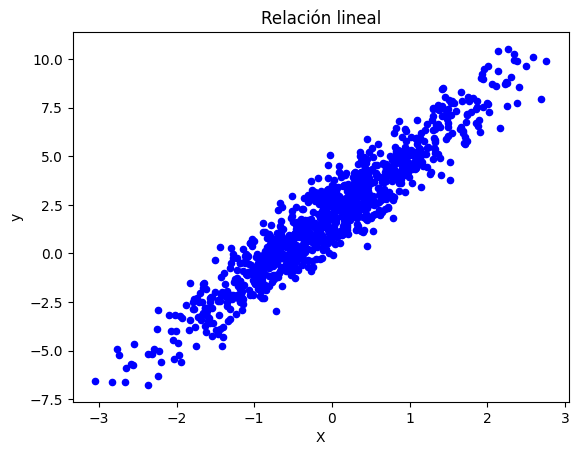

In [ ]:
plt.scatter(X1, y1, c = "blue", s = 20)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relación lineal")
plt.show()

### Estimación de los parámetros

Para encontrar la recta que mejor ajusta a estos datos, el paquete `sklearn` tiene la función `LinearRegression()`. Luego se pide buscar la recta que mejor ajusta a estos datos con el método `.fit()`

In [ ]:
from sklearn.linear_model import LinearRegression
# Le informamos a Python que vamos a hacer una regresión lineal
reg_lin = LinearRegression()
# Una vez que sabe que vamos a hacer una regresión lineal, le pedimos que la ajuste a los datos
reg_lin.fit(X1, y1)

LinearRegression()

In [ ]:
# Ordenada (cercano a 2) y pendiente (cercano a 3)
print([reg_lin.intercept_,reg_lin.coef_])

[array([2.01221825]), array([[2.9690942]])]


In [ ]:
# Vamos a graficar cómo ajusta el modelo a los datos, para eso, tomamos valores entre el mínimo y el máximo de X1
X1_pred= np.linspace(np.min(X1),np.max(X1),2).reshape(-1, 1)
y1_pred = reg_lin.predict(X1_pred)
y1_real = 2+3*X1_pred

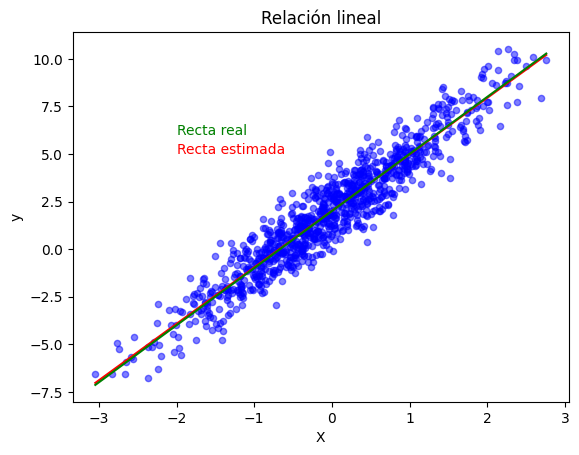

In [ ]:
# Datos
plt.scatter(X1, y1, c = "blue", s = 20,alpha=0.5)
# Recta estimada
plt.text(-2,5,"Recta estimada",c="red")
plt.plot(X1_pred,y1_pred,c="red")
# Recta real
plt.text(-2,6,"Recta real",c="green")
plt.plot(X1_pred,y1_real,c="green")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relación lineal")
plt.show()

### Seaborn

Otra forma de hacer esto mismo directamente es con el paquete `seaborn`

In [ ]:
import seaborn as sns

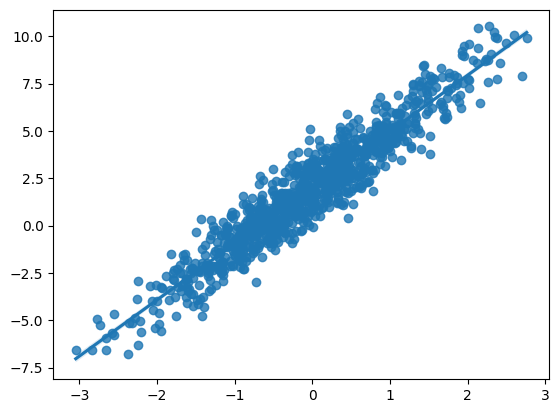

In [ ]:
sns.regplot(x=X1,y=y1)
plt.show()

### Tendencia cuadrática

Supongamos que estos mismos datos se relacionan de forma cuadrática con la variable `y2`:

In [ ]:
# Notar que la recta generada se centra en una ordenada de valor 2 y una pendiente de valor 3 y coeficiente principal 1.5
X1_cuad=X1**2
y2 = 2 + 3 * X1+ 1.5 * X1_cuad + np.random.randn(N1, 1)

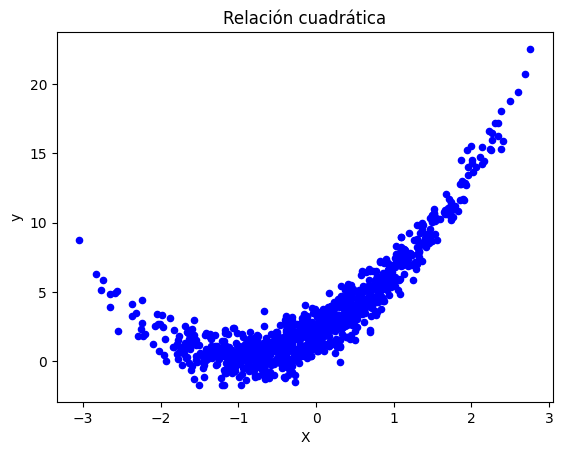

In [ ]:
plt.scatter(X1, y2, c = "blue", s = 20)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relación cuadrática")
plt.show()

In [ ]:
# Le informamos a Python que vamos a hacer una regresión lineal
reg_lin2 = LinearRegression()
# Una vez que sabe que vamos a hacer una regresión lineal, le pedimos que la ajuste a los datos
reg_lin2.fit(X1, y2)

LinearRegression()

In [ ]:
# Vamos a graficar cómo ajusta el modelo a los datos, para eso, tomamos valores entre el mínimo y el máximo de X1
N2=100
X2_pred= np.linspace(np.min(X1),np.max(X1),N2).reshape(-1, 1)
y2_pred = reg_lin2.predict(X2_pred)

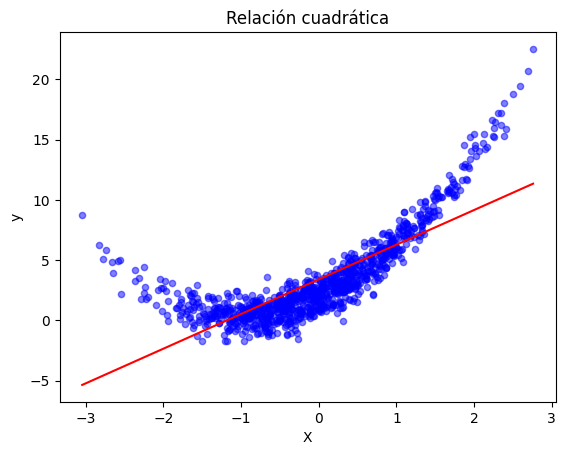

In [ ]:
# Datos
plt.scatter(X1, y2, c = "blue", s = 20,alpha=0.5)
# Recta estimada
plt.plot(X2_pred,y2_pred,c="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relación cuadrática")
plt.show()

Vemos que la recta no es representativa de los datos, sobre todo aquellos con valores de `X` positivos. Sin embargo, la regresión lineal no siempre se dispone en forma de recta, si se agregan más variables, puede tomar otra forma la predicción ya que se generan más combinaciones entre variables. Lo importante de la regresión lineal es que el modelo considere la **suma** de variables multiplicadas por sus coeficientes.

En este caso, tomaremos un modelo cuadrático, considerando las variables `X1` y su cuadrado:

In [ ]:
X1=np.array([c for x in X1 for c in x]).reshape(N1,)
X1_cuad=X1**2

In [ ]:
import pandas as pd
df1=pd.DataFrame({"X1":X1,"X1_cuad":X1_cuad})

In [ ]:
print(df1)

           X1   X1_cuad
0    1.764052  3.111881
1    0.400157  0.160126
2    0.978738  0.957928
3    2.240893  5.021602
4    1.867558  3.487773
..        ...       ...
995  0.412871  0.170462
996 -0.198399  0.039362
997  0.094192  0.008872
998 -1.147611  1.317011
999 -0.358114  0.128246

[1000 rows x 2 columns]


In [ ]:
# Le informamos a Python que vamos a hacer una regresión lineal
reg_cuad = LinearRegression()
# Una vez que sabe que vamos a hacer una regresión lineal, le pedimos que la ajuste a los datos
reg_cuad.fit(df1, y2)

LinearRegression()

In [ ]:
print(reg_cuad.intercept_)
print(reg_cuad.coef_)
print([reg_cuad.intercept_,reg_cuad.coef_])

[1.99474358]
[[2.96077882 1.45109289]]
[array([1.99474358]), array([[2.96077882, 1.45109289]])]


In [ ]:
df1_pred=pd.DataFrame({"X1":X2_pred.reshape(N2,)})
df1_pred["X1_cuad"]=df1_pred["X1"]**2
# Vamos a graficar cómo ajusta el modelo a los datos, para eso, tomamos valores entre el mínimo y el máximo de X1
y3_pred = reg_cuad.predict(df1_pred)

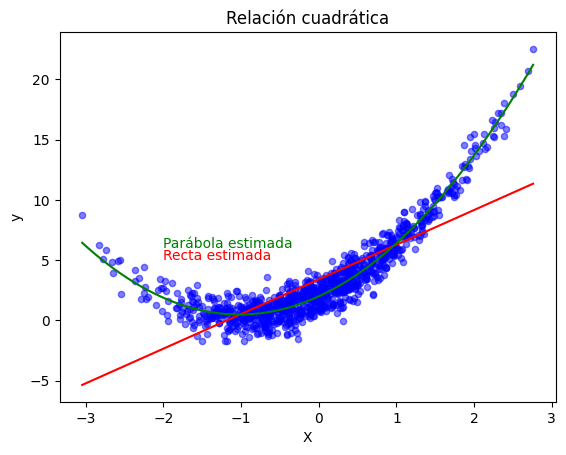

In [ ]:
# Datos
plt.scatter(X1, y2, c = "blue", s = 20,alpha=0.5)
# Recta estimada
plt.text(-2,5,"Recta estimada",c="red")
plt.plot(X2_pred,y2_pred,c="red")
# Parábola estimada
plt.plot(X2_pred,y3_pred,c="green")
plt.text(-2,6,"Parábola estimada",c="green")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relación cuadrática")
plt.show()

## Overfitting



Supongamos que usamos el primer modelo lineal (base de entrenamiento), para predecir los valores de la relación cuadrática (base de testeo).

In [ ]:
y2_pred_lin=reg_lin.predict(X2_pred)

Vemos que la estimación es aún peor que la anterior, porque se basó en las respuestas lineales que no se pueden extrapolar a estas respuestas cuadráticas.

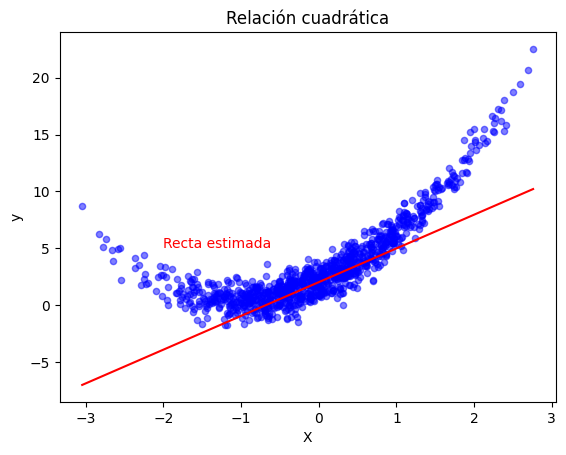

In [ ]:
# Datos
plt.scatter(X1, y2, c = "blue", s = 20,alpha=0.5)
# Recta estimada
plt.text(-2,5,"Recta estimada",c="red")
plt.plot(X2_pred,y2_pred_lin,c="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relación cuadrática")
plt.show()

Se ve también al comparar las métricas el overfitting

In [ ]:
from sklearn.metrics import mean_squared_error
y1_pred=reg_lin.predict(X1.reshape(-1,1))
y2_pred_lin=reg_lin.predict(X1.reshape(-1,1))
train_mse = mean_squared_error(y1, y1_pred)
test_mse = mean_squared_error(y2, y2_pred_lin)
print(train_mse)
print(test_mse)

0.9364031961476974
6.772896166028153


En general, no es buena idea utilizar datos de distintas bases para dividir en base de entrenamiento y testeo.

Por lo tanto, conviene agarrar una porción de los mismos datos para entrenar (generalmente entre el 70% y el 80%) con el siguiente comando:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [ ]:
reg_lin3 = LinearRegression()
reg_lin3.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [ ]:
y_pred_train=reg_lin3.predict(X_train.reshape(-1,1))
y_pred_test=reg_lin3.predict(X_test.reshape(-1,1))

In [ ]:
y_rec_train=reg_lin3.predict(X1_pred)
y_rec_test=reg_lin3.predict(X1_pred)

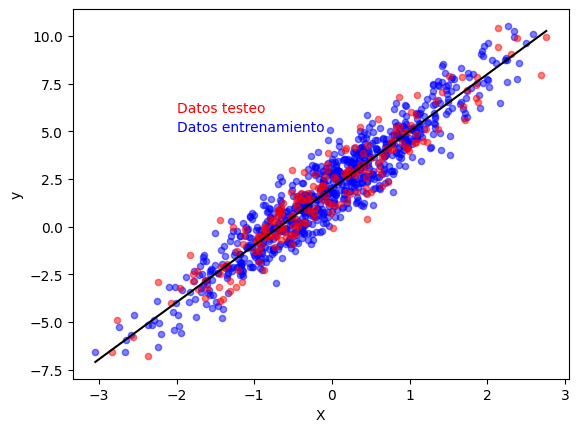

In [ ]:
# Datos entrenamiento
plt.scatter(X_train, y_train, c = "blue", s = 20,alpha=0.5)
plt.text(-2,5,"Datos entrenamiento",c="blue")
# Datos testeo
plt.scatter(X_test, y_test, c = "red", s = 20,alpha=0.5)
plt.plot(X1_pred, y_rec_train, c = "black")
plt.text(-2,6,"Datos testeo",c="red")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(train_mse)
print(test_mse)

0.9401877285295507
0.9229878938553934


## Variables distintas



A veces, las tendencias pueden no ser lineales ni cuadráticas, sino que no se observa una tendencia lineal ya que involucra a distintas variables. Veamos el siguiente ejemplo:

In [ ]:
# Crear datos de entrenamiento y prueba
np.random.seed(0)
# Generamos datos aleatorios con distribución normal
X1 = np.random.randn(N1, 1)
# Generamos otros datos aleatorios con distribución uniforme
X2 = 2+4*np.random.rand(N1, 1);X2=X2**2
# Notar que la recta generada se centra en una ordenada de valor 2 y una pendiente de valor 3
y4 = 2 + 3 * X1 +5*X2+ np.random.randn(N1, 1)

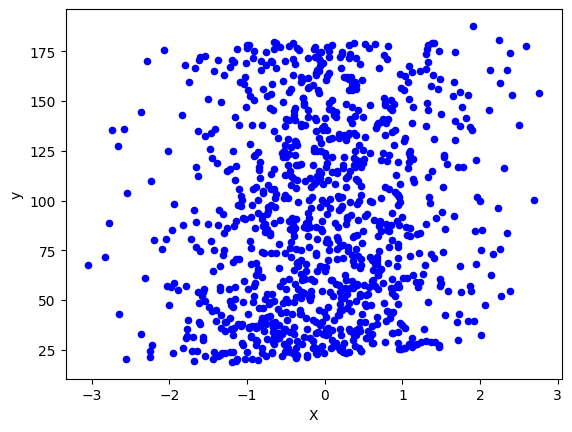

In [ ]:
plt.scatter(X1, y4, c = "blue", s = 20)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Si bien la tendencia no es lineal en la variable `X1`, si planteamos un modelo lineal con ambas variables, vemos que las predicciones se ajustan bien a los datos:

In [ ]:
df2=pd.DataFrame(X1,columns=["X1"])
df2["X2"]=X2
reg_lin4 = LinearRegression()
reg_lin4.fit(df2,y4)
y4_pred=reg_lin4.predict(df2)

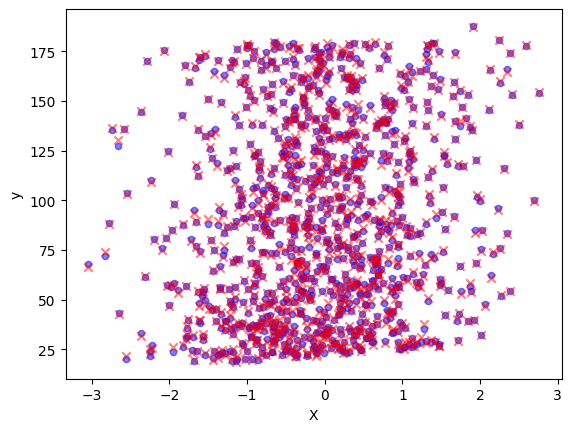

In [ ]:
plt.scatter(X1, y4, c = "blue", s = 20,alpha=0.5)
plt.scatter(X1, y4_pred, c = "red", marker = "x",alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Base real

La siguiente base "home_sales_nyc.csv" describe datos sobre ventas inmobiliarias en la ciudad de Nueva York (disponible en https://github.com/DataScienceForPublicPolicy/diys/tree/main/data )

In [ ]:
# El link a la base de datos como string
url = 'https://raw.githubusercontent.com/DataScienceForPublicPolicy/diys/main/data/home_sales_nyc.csv'
# Se usa la librería pandas para leer el .csv
df = pd.read_csv(url)

## Inspección de la base

Para verificar que la base está bien cargada, visualizamos las primeras 5 filas de la misma:

In [ ]:
df.head()

,time.index,borough,neighborhood,building.class.category,zip.code,residential.units,commercial.units,total.units,land.square.feet,gross.square.feet,year.built,sale.price,sale.date,sale.year,age
0,14,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,2500,1474,1901,241500.0,2018-08-17,2018,117
1,162,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,1578,1470,1899,180000.0,2018-03-22,2018,119
2,298,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,1694,1497,1899,246000.0,2017-11-06,2017,118
3,179,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,1694,1497,1899,255000.0,2018-03-05,2018,119
4,336,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,3525,1340,1899,380250.0,2017-09-29,2017,118


Llas 5 filas que se muestran no son las totales de la base de datos, son sólo las que se muestran.

La primer columna no se corresponde con ninguna variable y hace referencia al índice, utilizado para recorrer las distintas filas.

Para seguir analizando la base, vamos a apelar al método `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12668 entries, 0 to 12667
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time.index               12668 non-null  int64  
 1   borough                  12668 non-null  int64  
 2   neighborhood             12668 non-null  object 
 3   building.class.category  12668 non-null  object 
 4   zip.code                 12668 non-null  int64  
 5   residential.units        12668 non-null  int64  
 6   commercial.units         12668 non-null  int64  
 7   total.units              12668 non-null  int64  
 8   land.square.feet         12668 non-null  int64  
 9   gross.square.feet        12668 non-null  int64  
 10  year.built               12668 non-null  int64  
 11  sale.price               12668 non-null  float64
 12  sale.date                12668 non-null  object 
 13  sale.year                12668 non-null  int64  
 14  age                   


Haremos foco ahora en las siguientes variables:

* gross.square.feet: superficie del inmueble (cuantitativa)

* sale.price: precio de venta (cuantitativa)

Se puede pensar que estas variables están vinculadas, ya que intuitivamente, a medida que los inmuebles son más grandes, más precio de venta tendrán.

## Gráfico exploratorio

Para analizar esta dependencia, hacemos un gráfico de dispersión ("scatterplot" en inglés), donde cada inmueble se corresponde con un punto en el gráfico, cuya coordenada horizontal es la superficie, y la coordenada vertical es el precio de venta.

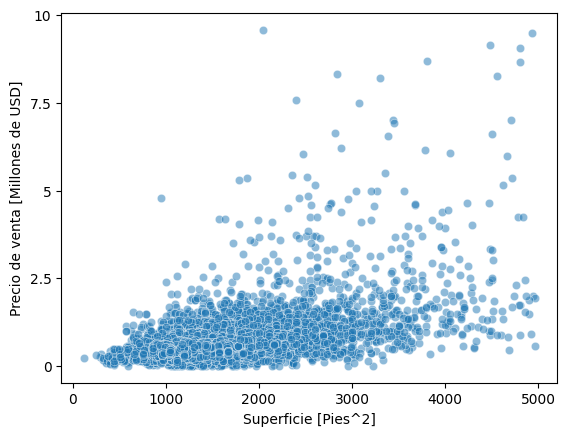

In [ ]:
# Creo un scatterplot que considere la base de datos df como parámetro
# fijando la coordenada x como la superficie y la coordenada y como el precio de venta
sns.scatterplot(data=df,x="gross.square.feet",y="sale.price",alpha=0.5)
# Al gráfico g se le agregan nombres adecuados para los ejes
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
# Este comando obliga a Python a mostrar el gráfico
plt.show()

# División en train y test

In [ ]:
# Variable de respuesta
resp="sale.price"
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df.loc[:,df.columns!=resp], df[resp], test_size = 0.3, random_state = 25)

## Regresión lineal simple

In [ ]:
# covs representa la covariable (superficie)
covs=["gross.square.feet"]
X_train=df_train[covs].copy()
X_test=df_test[covs].copy()
# Se inicializa la regresión
mod=LinearRegression()
# Se buscan los valores óptimos de a y b para los datos de la base
mod.fit(X_train,y_train)
# El valor óptimo de a se obtiene con "intercept_" y el de b con ".coef_".
# Como se devuelven listas, se convierten a variables numéricas con "float"
print([float(mod.intercept_),float(mod.coef_)])

[-55029.47531252727, 473.7218634154894]


## Evaluación gráfica


Para evaluar gráficamente el modelo, se puede unir con una línea dos valores predichos, tomando los mínimos y máximos de la superficie del inmueble como coordenada $x$ y tomando sus estimaciones como coordenada $y$.

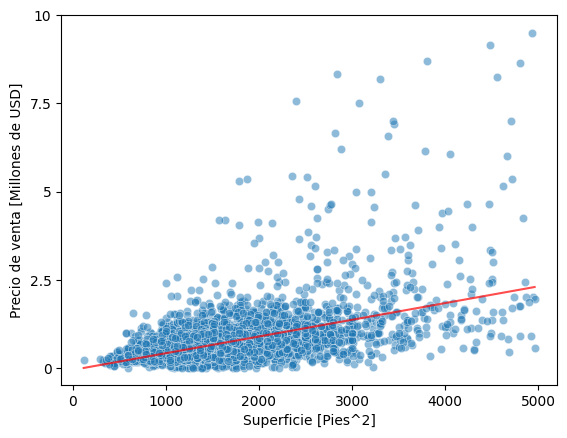

In [ ]:
# Calculo el mínimo y el máximo
minX=df_train['gross.square.feet'].min()
maxX=df_train['gross.square.feet'].max()
# Genero una nueva base con las predicciones
df_pred=pd.DataFrame({"gross.square.feet":[minX,maxX]})
df_pred["sale.price"]=mod.predict(df_pred)
# Uno ambas predicciones con una línea
sns.scatterplot(data=df_train,x="gross.square.feet",y=y_train,alpha=0.5)
sns.lineplot(data=df_pred,x="gross.square.feet",y="sale.price",alpha=0.7,color="red")
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

También podemos ver cómo ajusta a los datos de testeo

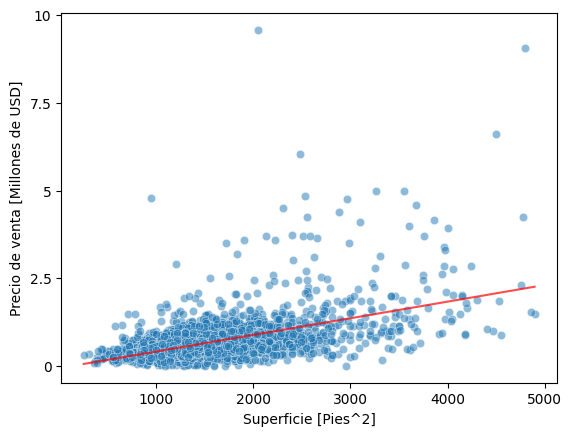

In [ ]:
# Calculo el mínimo y el máximo
minX=df_test['gross.square.feet'].min()
maxX=df_test['gross.square.feet'].max()
# Genero una nueva base con las predicciones
df_pred=pd.DataFrame({"gross.square.feet":[minX,maxX]})
df_pred["sale.price"]=mod.predict(df_pred)
# Uno ambas predicciones con una línea
sns.scatterplot(data=df_test,x="gross.square.feet",y=y_test,alpha=0.5)
sns.lineplot(data=df_pred,x="gross.square.feet",y="sale.price",alpha=0.7,color="red")
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

## Evaluación numérica del modelo


Un valor estándard para evaluar el rendimiento de un modelo, es la magnitud denominada $R^2$. Este valor evalúa las similitudes entre la variable independiente y las predicciones de la variable independiente. Sus valores van entre 0 y 1, y mientras más cercanos esté a 1, mejor es el modelo para representar los datos.

In [ ]:
mod.score(X_train,y_train)

0.25446238004630717

Vemos que el valor de $R^2$ no es tan alto, en el gráfico se ve que para algunos valores altos de la superficie, la recta queda lejos de algunos inmuebles con precios muy altos de venta.

In [ ]:
mod.score(X_test,y_test)

0.25282181813724447

Otra métrica utilizada para comparar modelos es el error cuadrático medio

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(mod.predict(X_train),y_train)
print("MSE train:"+str(mse_train))
mse_test=mean_squared_error(mod.predict(X_test),y_test)
print("MSE test:"+str(mse_test))

MSE train:221822513745.05777
MSE test:199641806867.85773


## Regresión lineal múltiple

In [ ]:
covs=["gross.square.feet","age","land.square.feet"]
X_train=df_train[covs].copy()
X_test=df_test[covs].copy()
mod=LinearRegression()
mod.fit(X_train,y_train)
# Mostramos los coeficientes
lis_coef=[[mod.intercept_],mod.coef_[0]]

Vemos además que aumenta aún más el valor de $R^2$ y se reduce el MSE:

In [ ]:
print(mod.score(X_train,y_train))
print(mod.score(X_test,y_test))

0.2731121187774799
0.2645867018733289


In [ ]:
mse_train=mean_squared_error(mod.predict(X_train),y_train)
print("MSE train:"+str(mse_train))
mse_test=mean_squared_error(mod.predict(X_test),y_test)
print("MSE test:"+str(mse_test))

MSE train:216273589297.36288
MSE test:196498296118.1105


### Evaluación gráfica
A diferencia de los casos anteriores, ahora se agrega una complejidad. Como las variables agregadas no tienen necesariamente relación con la superficie del inmueble, puede ocurrir lo siguiente: para dos inmuebles de igual superficie, pero distinta antigüedad por ejemplo, los precios de venta estimados pueden diferir.

Por lo tanto, ya no sirve sobreponer una única curva sobre los datos originales ya que las predicciones pueden no estar necesariamente conectadas entre sí. Además, tiene que estar la opción de agregar predicciones para **todas** las combinaciones posibles de las tres variables involucradas.

Por lo tanto, en vez de predecir algunos valores representativos, vamos a predecir **todos** los datos originales. Es decir, las variables que usamos para predecir las aplicamos en todas las instancias (sin repetición de combinaciones):

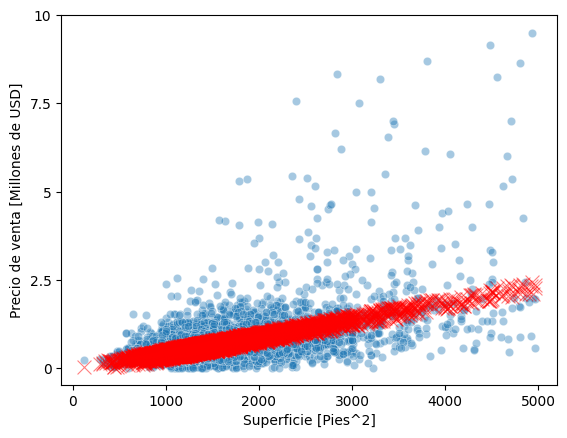

In [ ]:
# Entrenamiento
df_pred=X_train.drop_duplicates().copy()
df_pred["sale.price"]=mod.predict(df_pred)
sns.scatterplot(data=df_train,x="gross.square.feet",y=y_train,alpha=0.4)
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

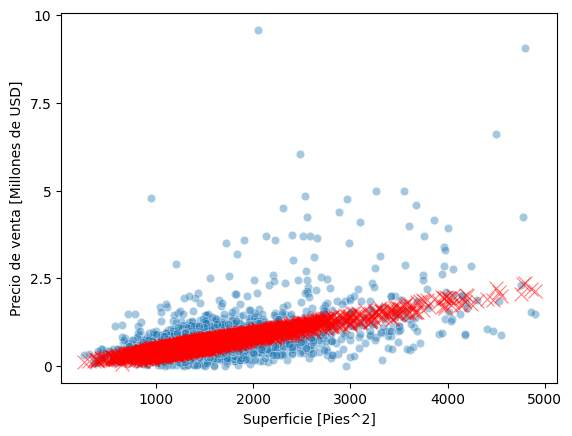

In [ ]:
# Testeo
df_pred=X_test.drop_duplicates().copy()
df_pred["sale.price"]=mod.predict(df_pred)
sns.scatterplot(data=df_test,x="gross.square.feet",y=y_test,alpha=0.4)
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

Notemos que en este caso, las estimaciones no están todas sobre la misma curva. Sobre todo en el medio, los puntos aparecen a distintas alturas para iguales valores de $x$. Justamente, esto se debe a que entran en juego las otras variables no disponibles en el gráfico (antigüedad y superficie del lote). Distintos valores de estas dos variables proveen distintas estimaciones y por lo tanto, tienen una "coordenada y" diferente.

Por otro lado, vale remarcar que esta variabilidad de las estimaciones también explica el incremento de $R^2$ con este modelo, ya que al tener más factores en cuenta, las estimaciones se pueden adaptar más a la heterogeneidad de los datos.

## Variables categóricas

Hay un factor que no fue considerado en el modelo anterior que es de suma importancia en el mercado inmobiliario: la **ubicación** del inmueble.

Sin embargo, surgen los siguientes inconvenientes:
* Al ser una variable categórica, ¿Cómo se "suma un distrito" numéricamente?
* Para "sumar" los valores de la variable "distrito", se puede establecer un código numérico para cada distrito (Distrito 1, Distrito 2, etc.). Sin embargo, este orden establecido es completamente arbitrario, podrían intercambiarse los valores (por ejemplo, puede cambiarse el Distrito 1, por el Distrito 2 y viceversa) y alterar todas las sumas que quisimos hacer previamente.

Por lo tanto, hay que tener cierto cuidado a la hora de incluir variables categóricas en un modelo de regresión.



## Gráfico exploratorio

Primero inspeccionemos cómo son los precios de venta respecto de las superficies en cada distrito:

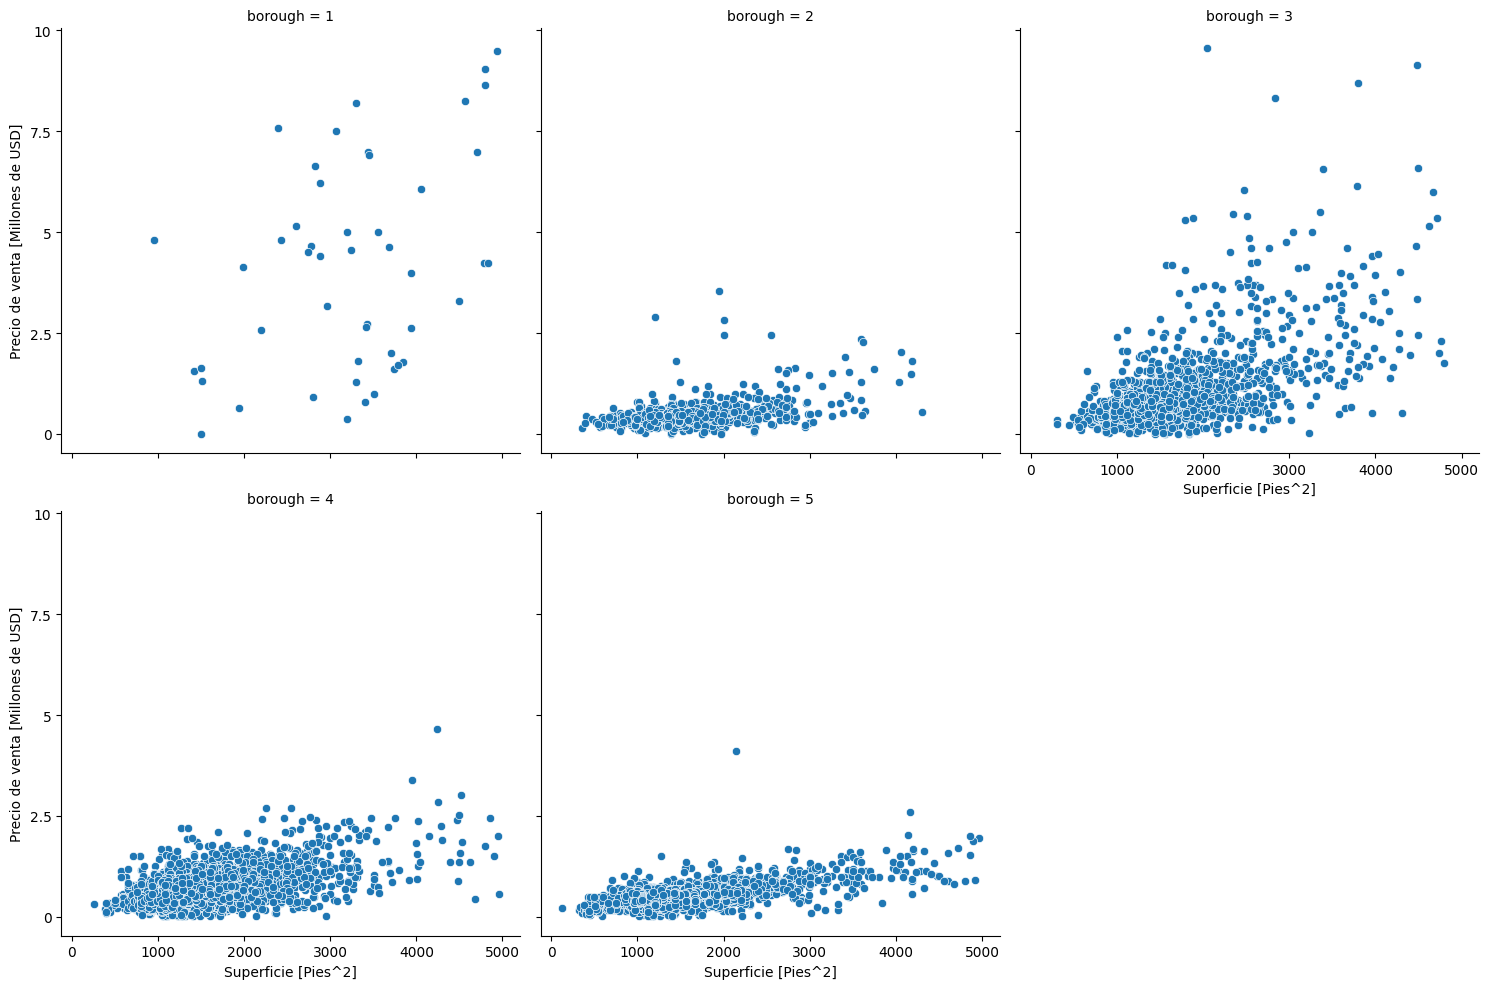

In [ ]:
g=sns.relplot(x="gross.square.feet", y="sale.price", data=df, kind="scatter",
col="borough",col_wrap=3)
g.set(xlabel="Superficie [Pies^2]",ylabel="Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

## Variables dummies

Para utilizar un criterio coherente, se crea una columna por cada nivel de la variable categórica que se quiere utilizar. Estas columnas agregadas se llaman "variables dummies" y sólo toman dos valores: 1 y 0. En python, se genera con el método "get_dummies".

In [ ]:
# Creamos una nueva base df1 con las variables dummies para la variable "borough"
df1_train=pd.get_dummies(df_train,columns=["borough"])
df1_test=pd.get_dummies(df_test,columns=["borough"])
# Mostramos los nombres de las columnas de la base original y en la base nueva
print("Columnas base original:")
print(df_train.columns.values)
print("Columnas base nueva:")
print(df1_train.columns.values)

Columnas base original:
['time.index' 'borough' 'neighborhood' 'building.class.category'
 'zip.code' 'residential.units' 'commercial.units' 'total.units'
 'land.square.feet' 'gross.square.feet' 'year.built' 'sale.date'
 'sale.year' 'age']
Columnas base nueva:
['time.index' 'neighborhood' 'building.class.category' 'zip.code'
 'residential.units' 'commercial.units' 'total.units' 'land.square.feet'
 'gross.square.feet' 'year.built' 'sale.date' 'sale.year' 'age'
 'borough_1' 'borough_2' 'borough_3' 'borough_4' 'borough_5']


Se ve que en la nueva base desaparece la variable `'borough'` y aparecen 5 nuevas variables: `'borough_1',
 'borough_2', 'borough_3', 'borough_4', 'borough_5'`. Es decir, se eliminó una columna pero se agregaron otras 5.

Veamos cómo se genera esta transformación y cómo se codifica la información:

In [ ]:
print("Base original:")
print(df_train[["borough","neighborhood"]].head())
covsB=[dV for dV in df1_train.columns.values if dV.startswith("borough_")]
print("Base con dummies:")
print(df1_train[covsB].head())

Base original:
       borough      neighborhood
3113         3    SHEEPSHEAD BAY
6152         4         LAURELTON
1814         3     EAST NEW YORK
11276        5  NEW DORP-HEIGHTS
12234        5       TOTTENVILLE
Base con dummies:
       borough_1  borough_2  borough_3  borough_4  borough_5
3113           0          0          1          0          0
6152           0          0          0          1          0
1814           0          0          1          0          0
11276          0          0          0          0          1
12234          0          0          0          0          1


Se puede ver que los inmuebles que pertenecen al distrito 5, tienen en la columna `'borough_5'` un 1 y un cero en las otras columnas. Del mismo modo, el inmueble que pertenece al distrito 4, tiene un 1 en la columna `'borough_4'` y un cero en las otras columnas. Lo mismo sucede con las observaciones de otro distrito. Es decir, se utilizan las columnas para saber a qué categoría pertenece.

Notar además, que todas las categorías presentan el mismo valor y por lo tanto, no se generan diferencias numéricas entre las mismas.

## Estimación

Para generar estas rectas específicas por distrito, debemos basarnos en las variables dummies, generando otras columnas multiplicando por la variable de superficie.

In [ ]:
# Los nombres de las variables dummies
covsB=[dV for dV in df1_train.columns.values if dV.startswith("borough_")]
# Los nombres de las nuevas variables de superficie multiplicadas por las variables dummies
covsBgsf=[dV+"_gsf" for dV in covsB]
for i in range(5):
  df1_train[covsBgsf[i]]=df1_train[covsB[i]]*df1_train["gross.square.feet"]
  df1_test[covsBgsf[i]]=df1_test[covsB[i]]*df1_test["gross.square.feet"]

Vemos que estas nuevas columnas guardan la información por distrito:

In [ ]:
covsB=[dV for dV in df1_train.columns.values if dV.startswith("borough_")]
print("Datos originales de superficie:")
print(df_train[["borough","gross.square.feet"]].head())
print("Datos nuevos de superficie:")
print(df1_train[covsB].head())

Datos originales de superficie:
       borough  gross.square.feet
3113         3                548
6152         4               1091
1814         3               1080
11276        5               1663
12234        5               1300
Datos nuevos de superficie:
       borough_1  borough_2  borough_3  borough_4  borough_5  borough_1_gsf  \
3113           0          0          1          0          0              0   
6152           0          0          0          1          0              0   
1814           0          0          1          0          0              0   
11276          0          0          0          0          1              0   
12234          0          0          0          0          1              0   

       borough_2_gsf  borough_3_gsf  borough_4_gsf  borough_5_gsf  
3113               0            548              0              0  
6152               0              0           1091              0  
1814               0           1080              0       

Notar que para los inmuebles del distrito 5, se obtienen valores distinto de cero en las columnas correspondientes al distrito 5. Más aún, la variable `'borough_5_gsf'` contiene los valores correspondientes a la superficie de cada inmueble de dicho distrito. Lo mismo ocurre con el resto de los distritos.

Con estas nuevas variables, podemos generar el modelo deseado:

In [ ]:
X_train=df1_train[covsB].copy()
X_test=df1_test[covsB].copy()
mod=LinearRegression(fit_intercept=False)
mod.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

### Evaluación del modelo

Aunque no llega a valores muy altos, vemos que el $R^2$ aumenta considerablemente respecto de los modelos anteriores. Esto se da porque las predicciones se adaptan mejor a la heterogeneidad de los datos. Para verlo gráficamente, primero agregamos las predicciones como filas de la base para que sea más fácil ordenarlos por distrito.

In [ ]:
print(mod.score(X_train,y_train))
print(mod.score(X_test,y_test))

0.48652296433220055
0.43117854185417837


In [ ]:
mse_train=mean_squared_error(mod.predict(X_train),y_train)
print("MSE train:"+str(mse_train))
mse_test=mean_squared_error(mod.predict(X_test),y_test)
print("MSE test:"+str(mse_test))

MSE train:152776685915.95233
MSE test:151985893654.34732


### Evaluación gráfica

Con esta base podemos ver las estimaciones por distrito. Se ve cómo fueron adaptadas distintas rectas para cada distrito.

In [ ]:
# Agrego una columna que describa el distrito para poder luego separar los gráficos según esta variable.
df1_train["borough"]=df_train["borough"].copy()
df1_train["sale.price"]=y_train.copy()
df1_test["borough"]=df_test["borough"].copy()
df1_test["sale.price"]=y_test.copy()
# De todas las variables de la base, sólo se requieren las siguientes para realizar las predicciones
vars=['gross.square.feet','borough_1','borough_2', 'borough_3', 'borough_4', 'borough_5',
       'borough_1_gsf', 'borough_2_gsf', 'borough_3_gsf', 'borough_4_gsf','borough_5_gsf', 'borough','sale.price']
# En la base nueva sólo me quedo con las variables seleccionadas
df1_train=df1_train[vars]
df1_test=df1_test[vars]
# La cantidad de variables generadas
nVars=len(vars)
# Agrego una columna para identificar a los datos observados
df1_train["clase"]=["Reales"]*df1_train.shape[0]
df1_test["clase"]=["Reales"]*df1_test.shape[0]
# Considero un vector entre el máximo y el mínimo de las superficies para graficar las predicciones
minX=df1_train["gross.square.feet"].min()
maxX=df1_train["gross.square.feet"].max()
xS=np.linspace(minX,maxX,100)
minX_test=df1_test["gross.square.feet"].min()
maxX_test=df1_test["gross.square.feet"].max()
xS_test=np.linspace(minX,maxX,100)
nS=len(xS)
# La variable "i" recorre los distritos
for i in range(1,6):
  # Inicio una base con la variable de superficie
  dfAux=pd.DataFrame({"gross.square.feet":xS})
  dfAux_test=pd.DataFrame({"gross.square.feet":xS_test})
  # La variable "j" recorre las variables correspondientes a los distritos
  for j in range(1,nVars-2):
    varAux=vars[j]
    # Si el número "i" aparece en la variable, hay un valor para imputar
    if str(i) in varAux:
      if "gsf" in varAux:
      # Si la variable tiene la combinación "gsf", es porque representa los
      # metros cuadrados de un inmueble de el distrito en cuestión
        dfAux[varAux]=dfAux["gross.square.feet"]
      else:
      # Si la variable No tiene la combinación "gsf", sólo debe imputarse un valor 1
        dfAux[varAux]=[1]*nS
    else:
      # Si la variable actual no corresponde al distrito "i", se agrega un 0
      dfAux[varAux]=[0]*nS
  # Agrego las variables que permiten igualar la base de predicciones con la base original
  dfAux["borough"]=i
  dfAux["sale.price"]=mod.predict(dfAux[covsB])
  dfAux["clase"]=["Estimados"]*nS
  # Agrego debajo de la base actual, la base con las estimaciones del distrito "i"
  df1_train=pd.concat([df1_train,dfAux])

<ipython-input-60-0caf63208c1f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_train["clase"]=["Reales"]*df1_train.shape[0]
<ipython-input-60-0caf63208c1f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test["clase"]=["Reales"]*df1_test.shape[0]


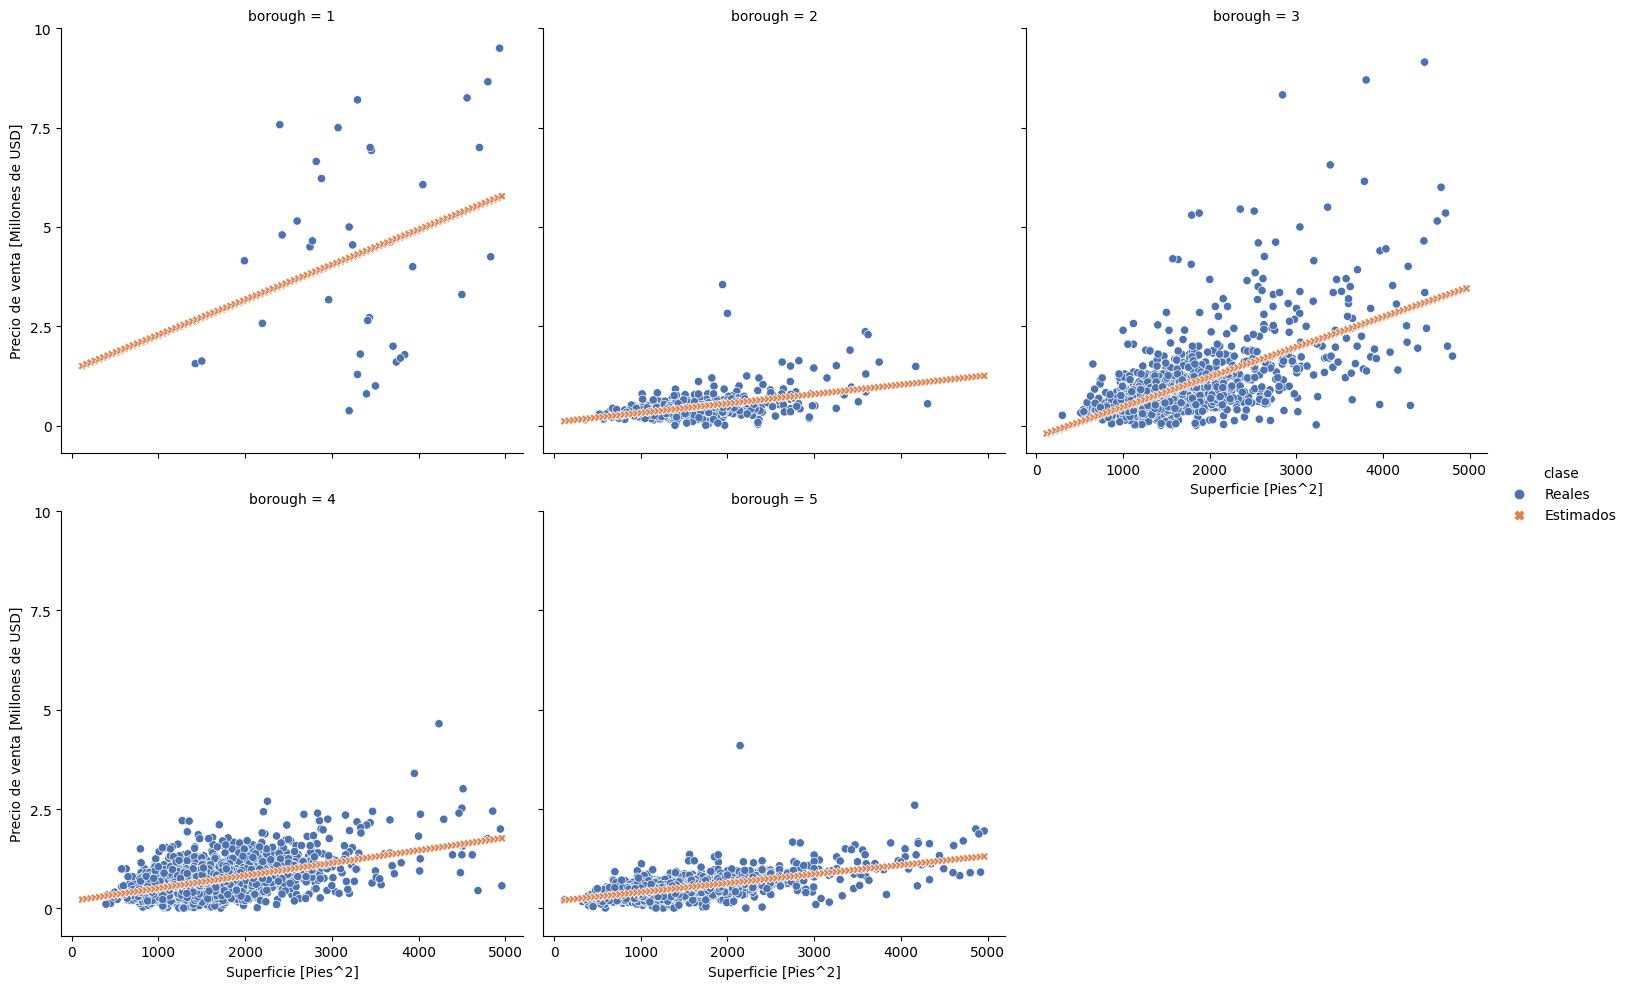

In [ ]:
# Entrenamiento
g=sns.relplot(x="gross.square.feet", y="sale.price", data=df1_train, kind="scatter",
col="borough",col_wrap=3,hue="clase",style="clase",markers={"Reales":"o","Estimados":"X"},palette="deep")
g.set(xlabel="Superficie [Pies^2]",ylabel="Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

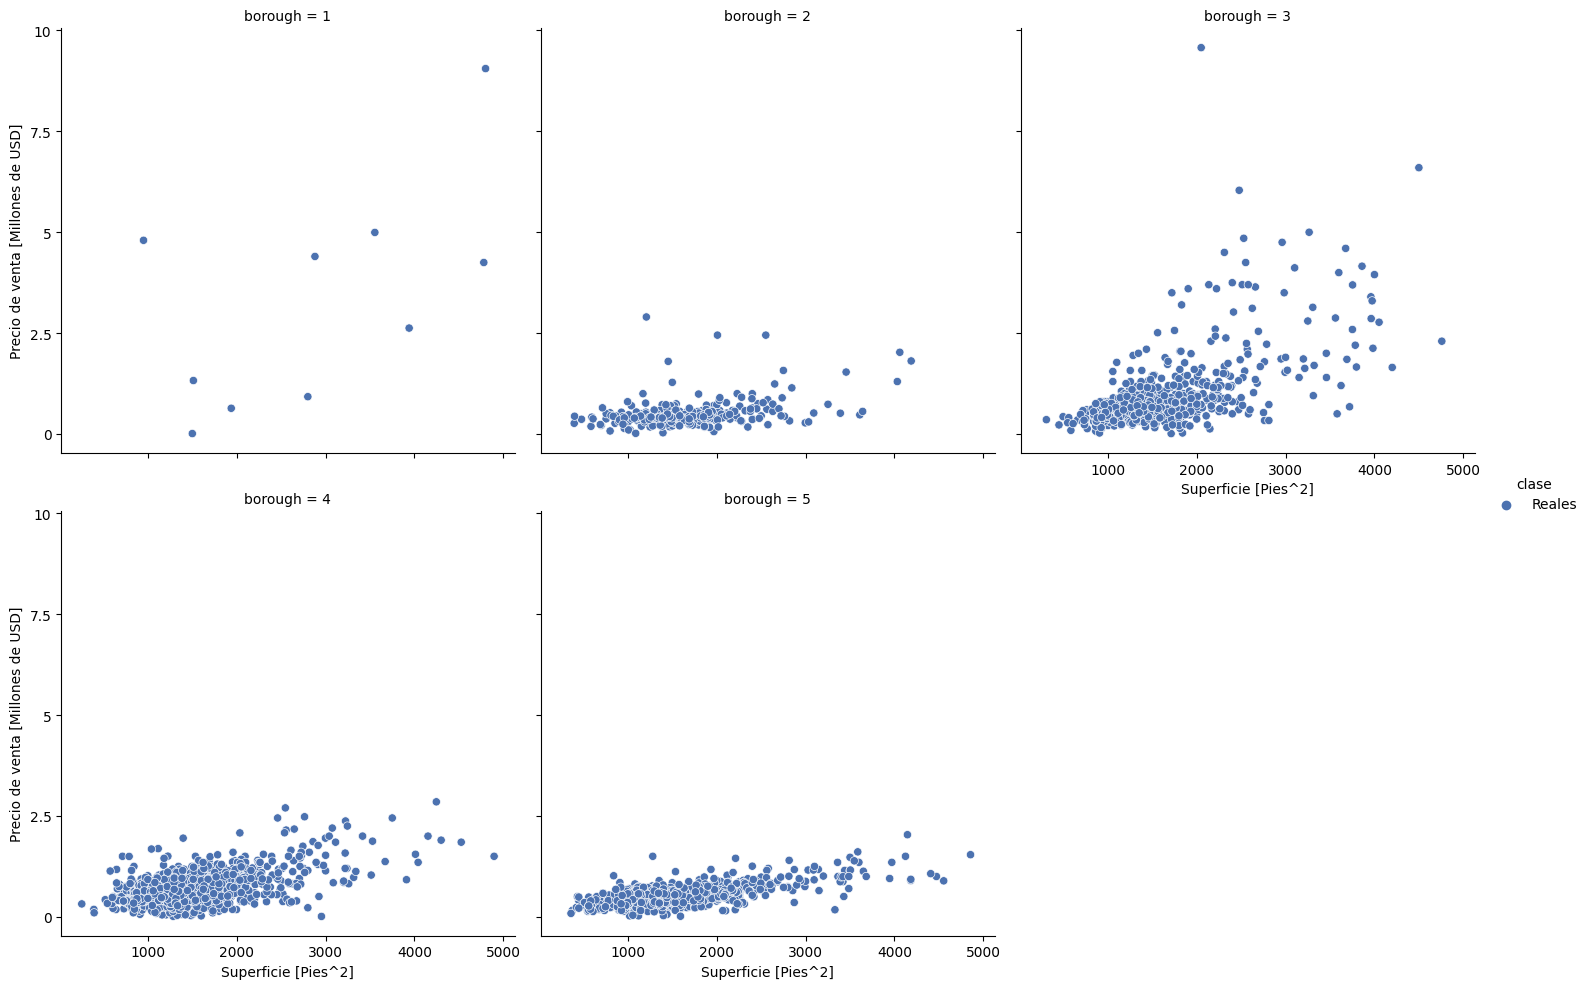

In [ ]:
# Testeo
g=sns.relplot(x="gross.square.feet", y=y_test, data=df1_test, kind="scatter",
col="borough",col_wrap=3,hue="clase",style="clase",markers={"Reales":"o","Estimados":"X"},palette="deep")
g.set(xlabel="Superficie [Pies^2]",ylabel="Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

## Regularización

In [ ]:
df1_train=pd.get_dummies(df_train,columns=["borough"])
df1_test=pd.get_dummies(df_test,columns=["borough"])
covsB=[dV for dV in df1_train.columns.values if dV.startswith("borough_")]
covsBgsf=[dV+"_gsf" for dV in covsB]
for i in range(5):
  df1_train[covsBgsf[i]]=df1_train[covsB[i]]*df1_train["gross.square.feet"]
  df1_test[covsBgsf[i]]=df1_test[covsB[i]]*df1_test["gross.square.feet"]

In [ ]:
print(df1_train.head())
print(df1_train.info())

       time.index      neighborhood  building.class.category  zip.code  \
3113           35    SHEEPSHEAD BAY  01 ONE FAMILY DWELLINGS     11235   
6152           52         LAURELTON  01 ONE FAMILY DWELLINGS     11413   
1814           72     EAST NEW YORK  01 ONE FAMILY DWELLINGS     11208   
11276         346  NEW DORP-HEIGHTS  01 ONE FAMILY DWELLINGS     10306   
12234         268       TOTTENVILLE  01 ONE FAMILY DWELLINGS     10307   

       residential.units  commercial.units  total.units  land.square.feet  \
3113                   1                 0            1              1571   
6152                   1                 0            1              5200   
1814                   1                 0            1              1190   
11276                  1                 0            1              5000   
12234                  1                 0            1              6216   

       gross.square.feet  year.built  ... borough_1  borough_2  borough_3  \
3113           

## Regresión lineal múltiple

Para comparar qué sucede con la regularización, vamos a incluir todas las variables en un modelo de regresión lineal, para luego regularizarlo.

In [ ]:
covs=["zip.code","residential.units","commercial.units","total.units","land.square.feet",
      "gross.square.feet","year.built","age","borough_1",
      "borough_2","borough_3","borough_4","borough_5","borough_1_gsf","borough_2_gsf",
      "borough_3_gsf","borough_4_gsf","borough_5_gsf"]
mod_lin = LinearRegression()
mod_lin.fit(df1_train[covs], y_train)
y_train_pred = mod_lin.predict(df1_train[covs])
y_test_pred = mod_lin.predict(df1_test[covs])

In [ ]:
mse_lin_train=mean_squared_error(y_train,y_train_pred)
print("MSE train:"+str(mse_lin_train))
mse_lin_test=mean_squared_error(y_test,y_test_pred)
print("MSE test:"+str(mse_lin_test))

MSE train:147405773483.7331
MSE test:145379393770.25372


## Ridge

In [ ]:
x=np.logspace(1,5,6)
print(x)
print(np.diff(x))
np.diff(np.log(x))

[1.00000000e+01 6.30957344e+01 3.98107171e+02 2.51188643e+03
 1.58489319e+04 1.00000000e+05]
[5.30957344e+01 3.35011436e+02 2.11377926e+03 1.33370455e+04
 8.41510681e+04]


array([1.84206807, 1.84206807, 1.84206807, 1.84206807, 1.84206807])

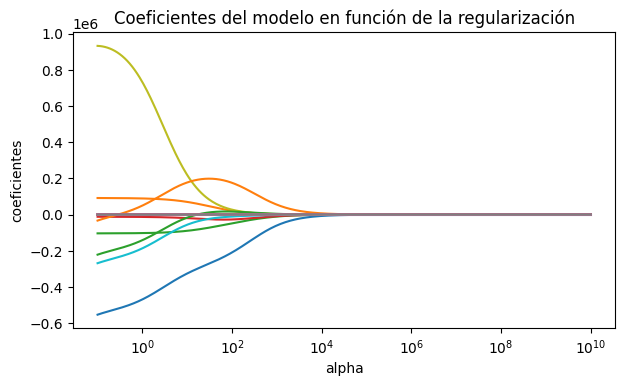

In [ ]:
from sklearn.linear_model import Ridge


alphas = np.logspace(-1, 10, 400)
mse_list = []
coefs = []

for alpha in alphas:
  modelo_temp = Ridge(alpha=alpha,fit_intercept=False)
  modelo_temp.fit(df1_train[covs], y_train)
  npAux=modelo_temp.coef_.flatten()
  y_pred = modelo_temp.predict(df1_test[covs])
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  coefs.append(npAux)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

### Valores de los coeficientes



In [ ]:
alpha_prueba=10**12
mod_prueba = Ridge(alpha=alpha_prueba,fit_intercept=False)
mod_prueba.fit(df1_train[covs], y_train)
print("coeficientes:")
print(list(zip(covs,mod_prueba.coef_)))

coeficientes:
[('zip.code', 28.928491875218977), ('residential.units', 0.0026282886089310543), ('commercial.units', 9.654579025584209e-05), ('total.units', 0.0027248343991868977), ('land.square.feet', 9.668983962314908), ('gross.square.feet', 5.340233800150525), ('year.built', 5.076297979215141), ('age', 0.20479305336390155), ('borough_1', 0.00015244446430102816), ('borough_2', 8.196567686241917e-05), ('borough_3', 0.0008470481653637008), ('borough_4', 0.0011342316579939142), ('borough_5', 0.0004017503430119303), ('borough_1_gsf', 0.533629008875272), ('borough_2_gsf', 0.1770240439796291), ('borough_3_gsf', 1.9000411969012774), ('borough_4_gsf', 1.9505738837268423), ('borough_5_gsf', 0.7789656666675043)]


## Selección del hiperparámetro

In [ ]:
rmse_list = np.sqrt(mse_list)

# Identificar el óptimo
min_rmse = np.min(rmse_list)
optimo = alphas[np.argmin(rmse_list)]

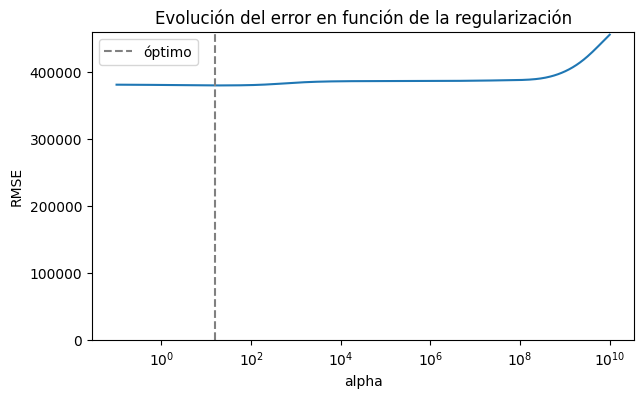

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(alphas, rmse_list)
ax.axvline(
    x=optimo,
    c="gray",
    linestyle='--',
    label='óptimo'
)
ax.set_xscale('log')
ax.set_ylim([0, None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend(loc='upper left')
plt.show()

In [ ]:
mod_opt = Ridge(alpha=optimo,fit_intercept=False)
mod_opt.fit(df1_train[covs], y_train)
y_train_pred = mod_opt.predict(df1_train[covs])
y_test_pred = mod_opt.predict(df1_test[covs])

In [ ]:
print("MSE train (Lineal):"+str(mse_lin_train))
print("MSE test (Lineal):"+str(mse_lin_test))
print("Diferencia (Lineal):"+str(mse_lin_train-mse_lin_test))
mse_rid_train=mean_squared_error(y_train,y_train_pred)
print("MSE train (Ridge):"+str(mse_rid_train))
mse_rid_test=mean_squared_error(y_test,y_test_pred)
print("MSE test (Ridge):"+str(mse_rid_test))
print("Diferencia (Ridge):"+str(mse_rid_train-mse_rid_test))

MSE train (Lineal):147405773483.7331
MSE test (Lineal):145379393770.25372
Diferencia (Lineal):2026379713.47937
MSE train (Ridge):148555564822.22278
MSE test (Ridge):145712904243.68207
Diferencia (Ridge):2842660578.5407104


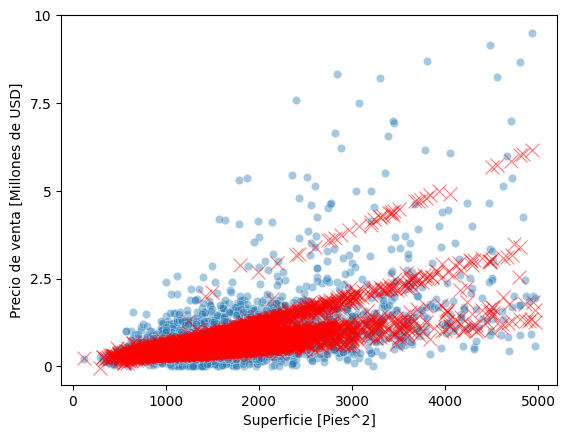

In [ ]:
# Entrenamiento
df_pred=df1_train[covs].drop_duplicates().copy()
df_pred["sale.price"]=mod_opt.predict(df_pred)
sns.scatterplot(data=df1_train,x="gross.square.feet",y=y_train,alpha=0.4)
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

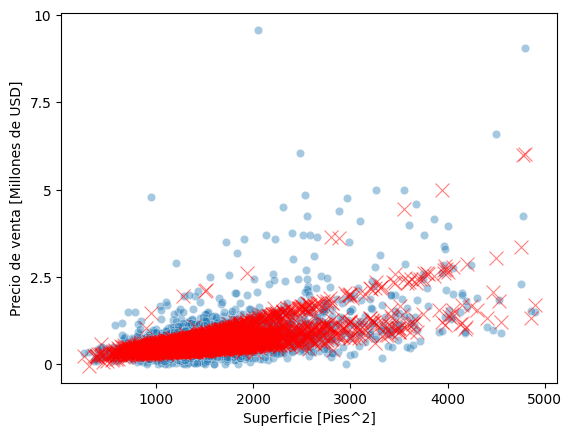

In [ ]:
# Testeo
df_pred=df1_test[covs].drop_duplicates().copy()
df_pred["sale.price"]=mod_opt.predict(df_pred)
sns.scatterplot(data=df1_test,x="gross.square.feet",y=y_test,alpha=0.4)
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

## LASSO

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.567e+14, tolerance: 6.552e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.567e+14, tolerance: 6.552e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.567e+14, tolerance: 6.552e

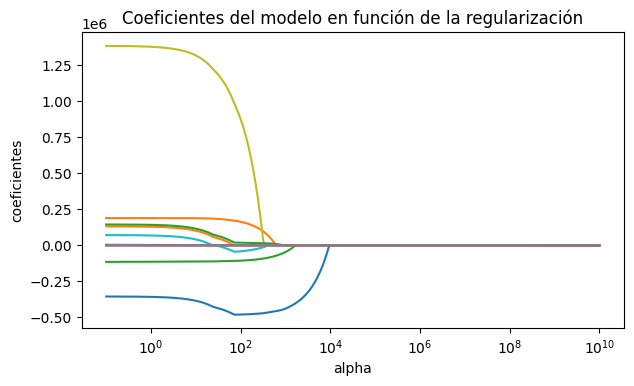

In [ ]:
from sklearn.linear_model import Lasso


alphas = np.logspace(-1, 10, 400)
mse_list = []

for alpha in alphas:
  modelo_temp = Lasso(alpha=alpha,fit_intercept=False)
  modelo_temp.fit(df1_train[covs], y_train)
  npAux=modelo_temp.coef_.flatten()
  y_pred = modelo_temp.predict(df1_test[covs])
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  coefs.append(npAux)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

### Valores de los coeficientes

In [ ]:
alpha_prueba=10**3
mod_prueba = Lasso(alpha=alpha_prueba,fit_intercept=False)
mod_prueba.fit(df1_train[covs], y_train)
print("coeficientes:")
print(list(zip(covs,mod_prueba.coef_)))

coeficientes:
[('zip.code', 21.007763353051512), ('residential.units', 0.0), ('commercial.units', -47564.20309658408), ('total.units', -0.0), ('land.square.feet', 37.59227993060651), ('gross.square.feet', 235.89669145490848), ('year.built', -19.858705637983395), ('age', -724.7415975418422), ('borough_1', 0.0), ('borough_2', -0.0), ('borough_3', -440606.88885471853), ('borough_4', 0.0), ('borough_5', 0.0), ('borough_1_gsf', 997.6853471480466), ('borough_2_gsf', -88.12817795084162), ('borough_3_gsf', 478.23399262493894), ('borough_4_gsf', 26.543242023111702), ('borough_5_gsf', -76.26660713247973)]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.632e+14, tolerance: 6.552e+11
  model = cd_fast.enet_coordinate_descent(


### Selección del hiperparámetro

In [ ]:
rmse_list = np.sqrt(mse_list)

# Identificar el óptimo
min_rmse = np.min(rmse_list)
optimo = alphas[np.argmin(rmse_list)]

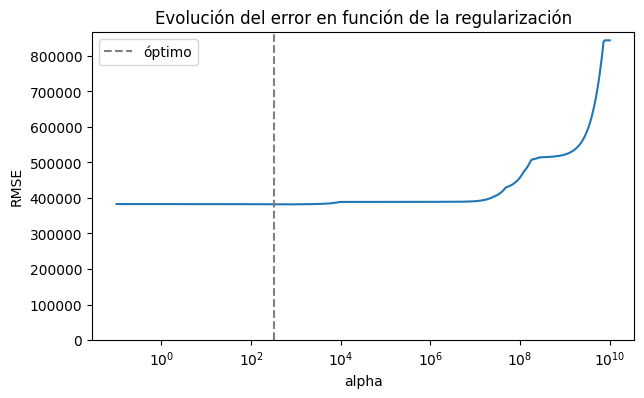

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(alphas, rmse_list)
ax.axvline(
    x=optimo,
    c="gray",
    linestyle='--',
    label='óptimo'
)
ax.set_xscale('log')
ax.set_ylim([0, None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend(loc='upper left')
plt.show()

In [ ]:
mod_opt = Lasso(alpha=optimo,fit_intercept=False)
mod_opt.fit(df1_train[covs], y_train)
y_train_pred = mod_opt.predict(df1_train[covs])
y_test_pred = mod_opt.predict(df1_test[covs])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.605e+14, tolerance: 6.552e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("MSE train (Lineal):"+str(mse_lin_train))
mse_lass_train=mean_squared_error(y_train,y_train_pred)
print("MSE train (Lasso):"+str(mse_lass_train))
print("MSE test (Lineal):"+str(mse_lin_test))
mse_lass_test=mean_squared_error(y_test,y_test_pred)
print("MSE test (Lasso):"+str(mse_lass_test))

MSE train (Lineal):147405773483.7331
MSE train (Lasso):148555564822.22278
MSE test (Lineal):145379393770.25372
MSE test (Lasso):145712904243.68207


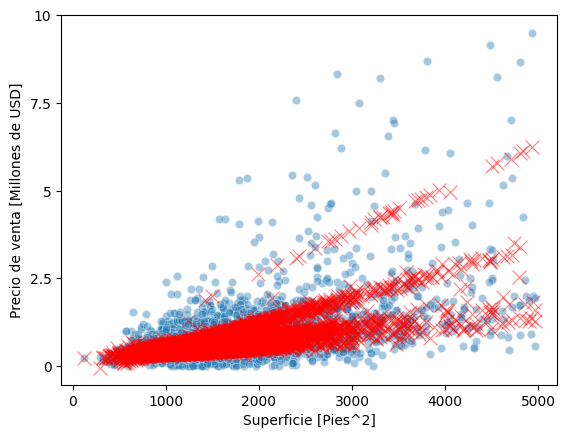

In [ ]:
# Entrenamiento
df_pred=df1_train[covs].drop_duplicates().copy()
df_pred["sale.price"]=mod_opt.predict(df_pred)
sns.scatterplot(data=df1_train,x="gross.square.feet",y=y_train,alpha=0.4)
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

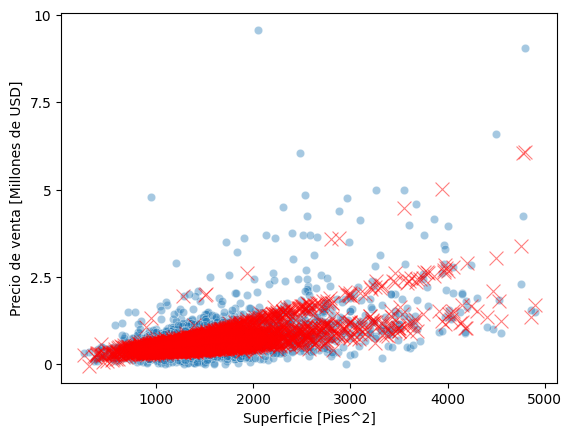

In [ ]:
# Testeo
df_pred=df1_test[covs].drop_duplicates().copy()
df_pred["sale.price"]=mod_opt.predict(df_pred)
sns.scatterplot(data=df1_test,x="gross.square.feet",y=y_test,alpha=0.4)
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

# Ejercitación

* Hacer un gráfico exploratorio de la siguiente base de salarios: [Salary Data](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data).
Eligir la variable de salario como respuesta.

In [ ]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
# En el link aportado, copiar y pegar todo lo que le sigue a "/datasets/"
!kaggle datasets download -d ___________

not enough values to unpack (expected 3, got 2)


In [ ]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [ ]:
# Examinar los archivos cargados seleccionando el ícono representando una carpeta que aparece a la izquierda
# Una vez identificada la base, acceder a las opciones con los tres puntos que aparecen a su derecha
# seleccionar "copiar ruta de archivo" o "copy path". Pegar con "Ctrl+v" esa ruta en la variable "path"
path=____________
df=pd.read_csv(path)

NameError: ignored

In [ ]:
sns.scatterplot(data=df,x=______,y="Salary",alpha=0.5)
# Nombrar correctamente los ejes
plt.xlabel("______")
plt.ylabel("______")
# Este comando obliga a Python a mostrar el gráfico
plt.show()

* Dividir en Train y Test. Hacer una regresión lineal para predecir el salario en función de otras variables. Para algunas variables cualitatitivas, generar variables dummies

In [ ]:
resp="Salary"
df_train, df_test, y_train, y_test = train_test_split(df.loc[:,df.columns!=resp], df[resp], test_size = 0.3, random_state = 25)

### Selección de variables de salida y entrada

In [ ]:
# Incluir las cualitativas que sean de relevancia
covs=[________]
X=df[covs].copy()
y=df[resp].copy()
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

### Variables dummies

In [ ]:
df_train=pd.get_dummies(df_train,columns=[__________])
df_test=pd.get_dummies(df_test,columns=[____________])

Con las variables dummies elegir las nuevas columnas

In [ ]:
covsDum=[_____________________]
X_train=df_train[covsDum].copy()
X_test=df_test[covsDum].copy()

### Inicialización

In [ ]:
mod=LinearRegression()
mod.fit(X_train,y_train)

### Predicciones

In [ ]:
y_train_pred=mod.predict(X_train)
y_test_pred=mod.predict(X_test)

### Evaluación

In [ ]:
mse_lin_train=mean_squared_error(y_train,y_train_pred)
print("MSE train:"+str(mse_lin_train))
mse_lin_test=mean_squared_error(y_test,y_test_pred)
print("MSE test:"+str(mse_lin_test))

In [ ]:
r2_train=mod.scor(X_train,y_train)
print("R2 train:"+str(r2_train))
r2_test=mean_squared_error(X_test,y_test)
print("R2 test:"+str(r2_test))

### Evaluación gráfica

In [ ]:
# Entrenamiento
df_pred=X_train.drop_duplicates().copy()
df_pred["Salary"]=mod.predict(df_pred)
sns.scatterplot(data=df_train,x=___________,y=y_train,alpha=0.4)
sns.scatterplot(data=df_pred,x=_______,y="Salary",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("___________")
plt.ylabel("___________")
plt.show()

In [ ]:
# Testeo
df_pred=X_test.drop_duplicates().copy()
df_pred["Salary"]=mod.predict(df_pred)
sns.scatterplot(data=df_test,x=___________,y=y_test,alpha=0.4)
sns.scatterplot(data=df_pred,x=_______,y="Salary",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("___________")
plt.ylabel("___________")
plt.show()

* Usar ambas regularizaciones Ridge y Lasso, identificar el hiperparámetro óptimo y volver a realizar las predicciones para comparar las métricas y gráficas. Identificar a partir del gráfico un valor de alpha que permita anular algún coeficiente mediante el método de Lasso.

In [ ]:
expMin=______________
expMax=______________
alphas = np.logspace(expMin, expMax, 400)
mse_list = []
coefs = []

for alpha in alphas:
  modelo_temp = Ridge(alpha=alpha,fit_intercept=False)
  modelo_temp.fit(df_train[covsDum], y_train)
  npAux=modelo_temp.coef_.flatten()
  y_pred = modelo_temp.predict(df_test[covsDum])
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  coefs.append(npAux)

In [ ]:
rmse_list = np.sqrt(mse_list)

# Identificar el óptimo
min_rmse = np.min(rmse_list)
optimo = alphas[np.argmin(rmse_list)]

In [ ]:
mod_opt = Ridge(alpha=alpha,fit_intercept=False)
mod_opt.fit(df_train[covsDum], y_train)
y_train_pred = mod_opt.predict(df_train[covsDum])
y_test_pred = mod_opt.predict(df_test[covsDum])

In [ ]:
print("MSE train (Lineal):"+str(mse_lin_train))
mse_rid_train=mean_squared_error(y_train,y_train_pred)
print("MSE train (Ridge):"+str(mse_rid_train))
print("MSE test (Lineal):"+str(mse_lin_test))
mse_rid_test=mean_squared_error(y_test,y_test_pred)
print("MSE test (Ridge):"+str(mse_rid_test))

In [ ]:
expMin=______________
expMax=______________
alphas = np.logspace(expMin, expMax, 400)
mse_list = []
coefs = []


for alpha in alphas:
  modelo_temp = Lasso(alpha=alpha,fit_intercept=False)
  modelo_temp.fit(df_train[covsDum], y_train)
  npAux=modelo_temp.coef_.flatten()
  y_pred = modelo_temp.predict(df_test[covsDum])
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)
  coefs.append(npAux)


In [ ]:
rmse_list = np.sqrt(mse_list)

# Identificar el óptimo
min_rmse = np.min(rmse_list)
optimo = alphas[np.argmin(rmse_list)]

In [ ]:
mod_opt = Lasso(alpha=alpha,fit_intercept=False)
mod_opt.fit(df_train[covsDum], y_train)
y_train_pred = mod_opt.predict(df_train[covsDum])
y_test_pred = mod_opt.predict(df_test[covsDum])

In [ ]:
print("MSE train (Lineal):"+str(mse_lin_train))
mse_lass_train=mean_squared_error(y_train,y_train_pred)
print("MSE train (Lasso):"+str(mse_lass_train))
print("MSE test (Lineal):"+str(mse_lin_test))
mse_lass_test=mean_squared_error(y_test,y_test_pred)
print("MSE test (Lasso):"+str(mse_lass_test))

In [ ]:
alpha_prueba=________________
mod_prueba = Lasso(alpha=alpha_prueba,fit_intercept=False)
mod_prueba.fit(df1_train[covs], y_train)
print("coeficientes:")
print(list(zip(covs,mod_prueba.coef_)))